In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
ROOT_DIR = '/content/gdrive/MyDrive/Colab Notebooks'
!ls

gdrive	sample_data  yolov8m-seg.pt


In [5]:
pip install opencv-python ultralytics numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 15.5 MB/s eta 0:00:00



0: 640x512 1 person, 2675.0ms
Speed: 5.0ms preprocess, 2675.0ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 512)


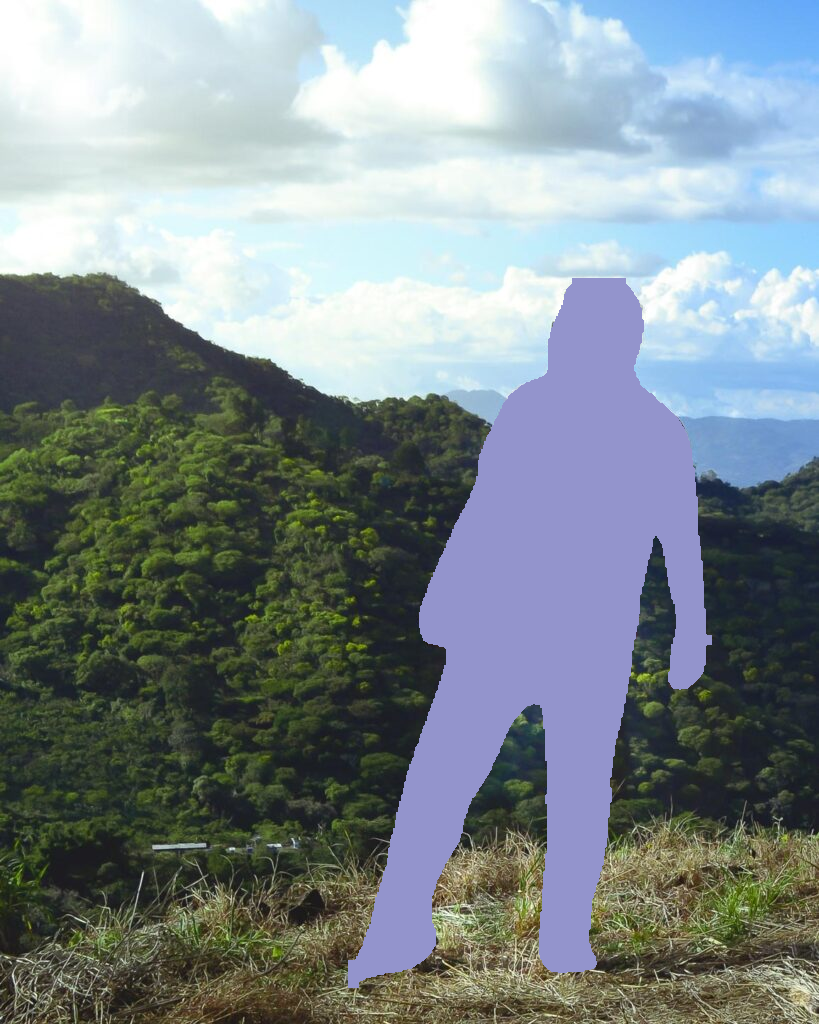

-1

In [32]:
from ultralytics import YOLO
import random
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

model = YOLO("yolov8m-seg.pt")
img = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/hombre_paisaje.jpg")

# if you want all classes
yolo_classes = list(model.names.values())
classes_ids = [yolo_classes.index(clas) for clas in yolo_classes]

conf = 0.5

results = model.predict(img, conf=conf)
colors = [random.choices(range(256), k=3) for _ in classes_ids]
#print(results)
for result in results:
    for mask, box in zip(result.masks.xy, result.boxes):
      if int(box.cls[0]) == 0:
        points = np.int32([mask])
        # cv2.polylines(img, points, True, (255, 0, 0), 1)
        color_number = classes_ids.index(int(box.cls[0]))
        cv2.fillPoly(img, points, colors[color_number])

cv2_imshow(img)
#cv2.imshow("Image", img)
cv2.waitKey(0)

#cv2.imwrite("YourSavePath", img)

#Tomado de: https://medium.com/@Mert.A/how-to-segment-with-yolov8-f33b1c63b6c6

NoneType